In [ ]:
# Generate
# Statistical-> mu and sigma 
# temp-> 15, 22, 16, 19 
# text and images


In [14]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

subscription_key = "a4363d57d3c94bada9b17f452cc497cc"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
search_term = "puppies"

In [15]:
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}

In [16]:
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()

In [19]:
searchResults = response.json()
searchResults['currentOffset']

0

In [24]:
thumbs = [ img for img in searchResults["value"][:10] ]

In [23]:
thumbs

[{'accentColor': '2592A6',
  'contentSize': '5454900 B',
  'contentUrl': 'https://get.pxhere.com/photo/puppy-dog-animal-cute-canine-pet-young-small-mammal-baby-miniature-close-up-lovely-furry-tiny-little-vertebrate-chihuahua-funny-domestic-adorable-breed-pup-doggy-companion-purebred-dog-like-mammal-carnivoran-714477.jpg',
  'creativeCommons': 'PublicNoRightsReserved',
  'datePublished': '2020-07-06T12:28:00.0000000Z',
  'encodingFormat': 'jpeg',
  'height': 2832,
  'hostPageDiscoveredDate': '2017-10-10T00:00:00.0000000Z',
  'hostPageDisplayUrl': 'https://pxhere.com/en/photo/714477',
  'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.GDPhuR_mcuXyb-ZBF05bUg&pid=Api',
  'hostPageUrl': 'https://pxhere.com/en/photo/714477',
  'imageId': '6C17F10706D27E749EA22005E866F1DEE3AF01AC',
  'imageInsightsToken': 'ccid_0sYUgOm3*cp_06389557468E5B1427C12B4CA0995D3E*mid_6C17F10706D27E749EA22005E866F1DEE3AF01AC*simid_608007390667671209*thid_OIP.0sYUgOm30XwfBn1VJ0KRlQHaE7',
  'insightsMetadata': {'av

In [25]:
thumbs = [ img['thumbnailUrl'] for img in searchResults["value"][:10] ]
thumbs

['https://tse1.mm.bing.net/th?id=OIP.0sYUgOm30XwfBn1VJ0KRlQHaE7&pid=Api',
 'https://tse3.mm.bing.net/th?id=OIP.aA2Njl7TnWWhpH911yJAlgHaFH&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.sl7nlNlXhJyqIRMApSFh4gHaLH&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.kZP6z3HkFcHdjw-F97_t5gHaJ4&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.SMPSbJqCRbhOQFjMAthrlwHaFj&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.wLtwp5TNwl99J3yiiTTgoAHaFj&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.5OkIFRDslOiO8YjNP1bZ2wHaFj&pid=Api',
 'https://tse3.mm.bing.net/th?id=OIP.RZKBfBnvQ2ZcT5AtWzWb8wHaFW&pid=Api',
 'https://tse2.mm.bing.net/th?id=OIP.aGxbI3Jgq6OAJZvx8ooIJwHaJl&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.0sXcGZc8AwgK5VhHbOIpWgHaFf&pid=Api']

In [31]:
# Saving into LOCAL dir
all_images = []
fname = 0
for thumb in thumbs:
  image = requests.get(thumb)
  image.raise_for_status()
  img = Image.open(BytesIO(image.content)).convert('RGBA')
  all_images.append(img)
  with open('thumb_' + str(fname) + '.png', 'wb') as f:
    xyz = bytearray(image.content)
    f.write(xyz)
    fname = fname + 1

  # PICKLE 

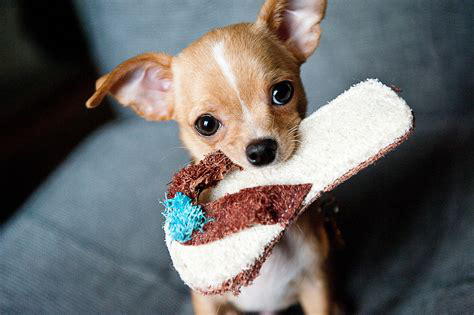

In [29]:
all_images[0]